In [1]:
# 分析用
import numpy as np
import pandas as pd

# プロット用
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習用
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

In [2]:
df = pd.read_csv("train.csv")
df = df.loc[:, ["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]]
df = df[np.isnan(df['Age']) == False]

In [3]:
df['Sex'] = df['Sex'].map(lambda x: 0 if x == "male" else 1)
df['Pclass_1'] = df['Pclass'].map(lambda x: 1 if x == 1 else 0)
df['Pclass_2'] = df['Pclass'].map(lambda x: 1 if x == 2 else 0)
df = df.drop("Pclass", axis = 1)

In [4]:
df[0:7]

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2
0,1,0,0,22.0,1,0,0,0
1,2,1,1,38.0,1,0,1,0
2,3,1,1,26.0,0,0,0,0
3,4,1,1,35.0,1,0,1,0
4,5,0,0,35.0,0,0,0,0
6,7,0,0,54.0,0,0,1,0
7,8,0,0,2.0,3,1,0,0


In [5]:
age = df['Age'].values
age = age[~np.isnan(age)]
age_suv = df[df['Survived'] == 1]['Age'].values
age_suv = age_suv[~np.isnan(age_suv)]
age_dead = df[df['Survived'] == 0]['Age'].values
age_dead = age_dead[~np.isnan(age_dead)]

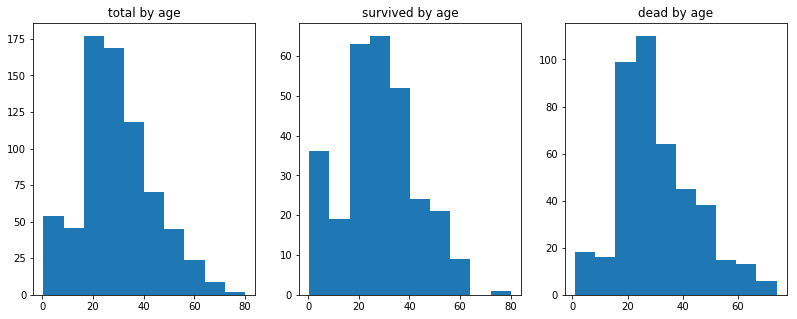

In [6]:
plt.figure(figsize=(13.5, 5))
plt.subplot(1,3,1)
plt.hist(age)
plt.title("total by age")
plt.subplot(1,3,2)
plt.hist(age_suv)
plt.title("survived by age")
plt.subplot(1,3,3)
plt.hist(age_dead)
plt.title("dead by age")

In [7]:
suvs = df[df['Survived'] == 1]['Age'].value_counts(sort=False).sort_index()
total = df['Age'].value_counts(sort=False).sort_index()

ages = np.array(["0:5", "5:10", "10:20", "20:30", "30:40", "40:50", "60:100"])
suvs_per = np.array([sum(suvs[0:5]) / sum(total[0:5]), sum(suvs[5:10]) / sum(total[5:10]),
                     sum(suvs[10:15]) / sum(total[10:15]), sum(suvs[15:20]) / sum(total[5:20]),
                     sum(suvs[20:25]) / sum(total[20:25]), sum(suvs[25:30]) / sum(total[25:30]),
                     sum(suvs[30:35]) / sum(total[30:35]), sum(suvs[35:40]) / sum(total[35:40]),
                     sum(suvs[40:45]) / sum(total[40:45]), sum(suvs[45:50]) / sum(total[45:50]),
                     sum(suvs[50:55]) / sum(total[50:55]), sum(suvs[55:60]) / sum(total[55:60]),
                     sum(suvs[60:65]) / sum(total[60:65]), sum(suvs[65:70]) / sum(total[65:70]),
                     sum(suvs[70:95]) / sum(total[70:95])])

In [8]:
suvs_per

array([ 0.70454545,  0.45833333,  0.52380952,  0.26618705,  0.32846715,
        0.36641221,  0.45132743,  0.45882353,  0.38333333,  0.41176471,
        0.44117647,  0.4       ,  0.33333333,  0.        ,  0.14285714])

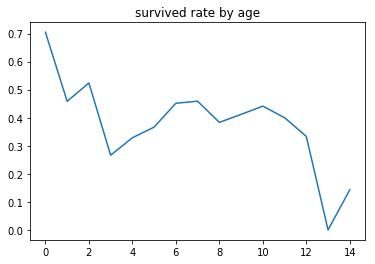

In [9]:
plt.title("survived rate by age")
plt.plot(suvs_per)

In [12]:
df['Squared-Age'] = pow(df['Age'],2)
df['Tripled-Age'] = pow(df['Age'],3)
df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Squared-Age,Tripled-Age
0,1,0,0,22.0,1,0,0,0,484.0,10648.0
1,2,1,1,38.0,1,0,1,0,1444.0,54872.0
2,3,1,1,26.0,0,0,0,0,676.0,17576.0
3,4,1,1,35.0,1,0,1,0,1225.0,42875.0
4,5,0,0,35.0,0,0,0,0,1225.0,42875.0


In [13]:
#各変数を正規化
df2 = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
df2["PassengerId"] = df['PassengerId']
df2['Survived'] = df['Survived']

In [14]:
df2.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Squared-Age,Tripled-Age
0,1,0,-0.365546,-0.096747,0.097479,-0.071895,-0.260504,-0.242297,-0.095122,-0.069356
1,2,1,0.634454,0.104309,0.097479,-0.071895,0.739496,-0.242297,0.054883,0.017019
2,3,1,0.634454,-0.046483,-0.102521,-0.071895,-0.260504,-0.242297,-0.065121,-0.055825
3,4,1,0.634454,0.066611,0.097479,-0.071895,0.739496,-0.242297,0.020663,-0.006413
4,5,0,-0.365546,0.066611,-0.102521,-0.071895,-0.260504,-0.242297,0.020663,-0.006413


In [15]:
df2_except = df2.drop("Survived", axis=1).drop("PassengerId", axis=1)
X = df2_except.as_matrix()
Y = df2['Survived'].as_matrix()

In [16]:
clf = LogisticRegression()
clf.fit(X, Y)
df_result = pd.DataFrame({"Name":df2_except.columns,"Coefficients":np.abs(clf.coef_[0])}).sort_values(by='Coefficients')
df_result.ix[:,['Name', 'Coefficients']]

,Name,Coefficients
7,Tripled-Age,0.058825
3,Parch,0.168842
6,Squared-Age,0.509778
5,Pclass_2,1.050891
2,SibSp,1.126952
1,Age,1.976398
4,Pclass_1,2.239408
0,Sex,2.449847


In [18]:
clf.intercept_[0]

-0.49094720675439424

In [19]:
clf.score(X,Y)

0.79971988795518212

\begin{eqnarray}
log(\frac{y}{1-y}) = 
-0.491 -1.976Age -0.510Age^2 -0.0588Age^3 + 2.45Sex + 2.24Pclass_1 + 1.05Pclass_2 - 1.13SibSp - 0.17 Parch
\end{eqnarray}

In [20]:
df2.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Squared-Age,Tripled-Age
0,1,0,-0.365546,-0.096747,0.097479,-0.071895,-0.260504,-0.242297,-0.095122,-0.069356
1,2,1,0.634454,0.104309,0.097479,-0.071895,0.739496,-0.242297,0.054883,0.017019
2,3,1,0.634454,-0.046483,-0.102521,-0.071895,-0.260504,-0.242297,-0.065121,-0.055825
3,4,1,0.634454,0.066611,0.097479,-0.071895,0.739496,-0.242297,0.020663,-0.006413
4,5,0,-0.365546,0.066611,-0.102521,-0.071895,-0.260504,-0.242297,0.020663,-0.006413


式を解くと、
\begin{eqnarray}
y = e^{eq}(1-y)
\end{eqnarray}
\begin{eqnarray}
(1+e^{eq})y = e^{eq}
\end{eqnarray}
\begin{eqnarray}
y = \frac{e^{eq}}{(1+e^{eq})}
\end{eqnarray}

In [21]:
#予測してみる
df2['eq'] = -0.491 - 1.976*df2['Age'] - 0.510 * pow(df2['Age'],2) - 0.0588 * pow(df2['Age'],3) + 2.45 * df2['Sex'] + 2.24 * df2['Pclass_1'] + 1.05 * df2['Pclass_2']- 1.13 * df2['SibSp'] - 0.17 * df2['Parch']

In [22]:
df2['e^eq'] = np.exp(df2['eq'])
df2['Survived-predicted'] = df2['e^eq'] / (1 + df2['e^eq'])

In [23]:
df2.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Squared-Age,Tripled-Age,eq,e^eq,Survived-predicted
0,1,0,-0.365546,-0.096747,0.097479,-0.071895,-0.260504,-0.242297,-0.095122,-0.069356,-2.136007,0.118126,0.105646
1,2,1,0.634454,0.104309,0.097479,-0.071895,0.739496,-0.242297,0.054883,0.017019,2.155812,8.634899,0.896211
2,3,1,0.634454,-0.046483,-0.102521,-0.071895,-0.260504,-0.242297,-0.065121,-0.055825,0.444296,1.559392,0.609282
3,4,1,0.634454,0.066611,0.097479,-0.071895,0.739496,-0.242297,0.020663,-0.006413,2.233638,9.333765,0.903230
4,5,0,-0.365546,0.066611,-0.102521,-0.071895,-0.260504,-0.242297,0.020663,-0.006413,-2.230362,0.107490,0.097057


In [24]:
df_pre = df2.ix[:,['Survived', 'Survived-predicted']]

In [38]:
df_pre['prediction'] = df_pre['Survived-predicted'].map(lambda x : 1 if x > 0.5 else 0)

In [39]:
df_pre.head()

,Survived,Survived-predicted,prediction
0,0,0.105646,0
1,1,0.896211,1
2,1,0.609282,1
3,1,0.903230,1
4,0,0.097057,0


In [50]:
(df_pre['Survived'] == df_pre['prediction']).value_counts(sort=False)

False    145
True     569
dtype: int64

In [51]:
r = {}
r["1-1"] = np.logical_and(df_pre['Survived'] == 1, df_pre['prediction'] == 1).value_counts(sort=False)[1]
r["1-0"] = np.logical_and(df_pre['Survived'] == 1, df_pre['prediction'] == 0).value_counts(sort=False)[1]
r["0-1"] = np.logical_and(df_pre['Survived'] == 0, df_pre['prediction'] == 1).value_counts(sort=False)[1]
r["0-0"] = np.logical_and(df_pre['Survived'] == 0, df_pre['prediction'] == 0).value_counts(sort=False)[1]

In [52]:
r

{'0-0': 362, '0-1': 62, '1-0': 83, '1-1': 207}

In [54]:
#正解率
(r['0-0'] + r['1-1']) / (r['0-0'] + r['1-1'] + r["1-0"] + r["0-1"]) *100

79.691876750700288

## Age が欠損の場合を予測する

In [70]:
df = pd.read_csv("train.csv")
df = df.loc[:, ["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]]
df = df[np.isnan(df['Age']) == True]
df['Sex'] = df['Sex'].map(lambda x: 0 if x == "male" else 1)
df['Pclass_1'] = df['Pclass'].map(lambda x: 1 if x == 1 else 0)
df['Pclass_2'] = df['Pclass'].map(lambda x: 1 if x == 2 else 0)
df = df.drop("Pclass", axis = 1)
#各変数を正規化
df2 = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
df2["PassengerId"] = df['PassengerId']
df2['Survived'] = df['Survived']
df2_except = df2.drop("Survived", axis=1).drop("PassengerId", axis=1).drop("Age", axis=1)

In [71]:
X = df2_except.as_matrix()
Y = df2['Survived'].as_matrix()

In [72]:
clf = LogisticRegression()
clf.fit(X, Y)
df_result = pd.DataFrame({"Name":df2_except.columns,"Coefficients":clf.coef_[0]}).sort_values(by='Coefficients')
df_result.ix[:,['Name', 'Coefficients']]

,Name,Coefficients
2,Parch,-0.989297
1,SibSp,-0.726358
4,Pclass_2,0.586183
3,Pclass_1,0.944868
0,Sex,2.575190


In [74]:
clf.intercept_[0]

-1.0650280759508106

In [76]:
df2['eq'] = -1.065 + 2.575 * df2['Sex'] + 0.945 * df2['Pclass_1'] + 0.586 * df2['Pclass_2'] - 0.726 * df2['SibSp'] - 0.989 * df2['Parch']
df2['e^eq'] = np.exp(df2['eq'])
df2['Survived-predicted'] = df2['e^eq'] / (1 + df2['e^eq'])
df_pre = df2.ix[:,['Survived', 'Survived-predicted']]
df_pre['prediction'] = df_pre['Survived-predicted'].map(lambda x : 1 if x > 0.5 else 0)
r = {}
r["1-1"] = np.logical_and(df_pre['Survived'] == 1, df_pre['prediction'] == 1).value_counts(sort=False)[1]
r["1-0"] = np.logical_and(df_pre['Survived'] == 1, df_pre['prediction'] == 0).value_counts(sort=False)[1]
r["0-1"] = np.logical_and(df_pre['Survived'] == 0, df_pre['prediction'] == 1).value_counts(sort=False)[1]
r["0-0"] = np.logical_and(df_pre['Survived'] == 0, df_pre['prediction'] == 0).value_counts(sort=False)[1]
r

{'0-0': 117, '0-1': 8, '1-0': 17, '1-1': 35}

In [77]:
#正解率
(r['0-0'] + r['1-1']) / (r['0-0'] + r['1-1'] + r["1-0"] + r["0-1"]) *100

85.875706214689259

## テスト予測

In [83]:
#とりあえず提出
df_test = pd.read_csv("test.csv")
df_test = df_test.loc[:, ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch"]]
df_test = df_test[np.isnan(df_test['Age']) == False]
df_test['Sex'] = df_test['Sex'].map(lambda x: 0 if x == "male" else 1)
df_test['Pclass_1'] = df_test['Pclass'].map(lambda x: 1 if x == 1 else 0)
df_test['Pclass_2'] = df_test['Pclass'].map(lambda x: 1 if x == 2 else 0)
df_test = df_test.drop("Pclass", axis = 1)

df_test2 = df_test.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
df_test2["PassengerId"] = df_test['PassengerId']

df_test2['eq'] = -0.490 - 2.3016*df_test2['Age'] + 2.451 * df_test2['Sex'] + 2.212 * df_test2['Pclass_1'] + 1.045 * df_test2['Pclass_2'] - 1.13 * df_test2['SibSp'] - 0.1845 * df_test2['Parch']
df_test2['e^eq'] = np.exp(df_test2['eq'])
df_test2['Survived-predicted'] = df_test2['e^eq'] / (1 + df_test2['e^eq'])
df_test2['Survived'] = df_test2['Survived-predicted'].map(lambda x : 1 if x > 0.5 else 0)
df_pre = df_test2.ix[:,['PassengerId', 'Survived']]

In [84]:
df_pre.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [92]:
df_test = pd.read_csv("test.csv")
df_test = df_test.loc[:, ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch"]]
df_test = df_test[np.isnan(df_test['Age']) == True]

df_test['Sex'] = df_test['Sex'].map(lambda x: 0 if x == "male" else 1)
df_test['Pclass_1'] = df_test['Pclass'].map(lambda x: 1 if x == 1 else 0)
df_test['Pclass_2'] = df_test['Pclass'].map(lambda x: 1 if x == 2 else 0)
df_test = df_test.drop("Pclass", axis = 1)
#各変数を正規化
df2 = df_test.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
df2["PassengerId"] = df_test['PassengerId']

df2['eq'] = -1.065 + 2.575 * df2['Sex'] + 0.945 * df2['Pclass_1'] + 0.586 * df2['Pclass_2'] - 0.726 * df2['SibSp'] - 0.989 * df2['Parch']
df2['e^eq'] = np.exp(df2['eq'])
df2['Survived-predicted'] = df2['e^eq'] / (1 + df2['e^eq'])
df2['Survived'] = df2['Survived-predicted'].map(lambda x : 1 if x > 0.5 else 0)
df_pre2 = df2.ix[:,['PassengerId', 'Survived']]

In [93]:
df_pre2.head()

,PassengerId,Survived
10,902,0
22,914,1
29,921,0
33,925,1
36,928,1


In [97]:
result = pd.concat([df_pre, df_pre2]).sort_values(by="PassengerId")

In [98]:
result.to_csv("result.csv", index = False,  header = True)